<a href="https://colab.research.google.com/github/diadeen/MIT_TENSORFLOW/blob/main/sequential_model_clincal_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [3]:
train_lables=[]
train_samples=[]

In [4]:
for i in range(50):
    # 5%
    # generate random younger between 13 and 64 has side effects
    random_younger = randint(13,64)
    # add the items in the sample data
    train_samples.append(random_younger)
    train_lables.append(1) # this lable that 1 has effect
    # generate random younger between 65 and 100 has no side effects
    random_older = randint(65,100)
    # add the items in the sample data
    train_samples.append(random_older)
    train_lables.append(0) # this lable that 1 has effect
    
for i in range(1000):
    #95%
    # generate random younger between 13 and 64 has no side effects
    random_younger = randint(13,64)
    # add the items in the sample data
    train_samples.append(random_younger)
    train_lables.append(0) # this lable that 1 has effect
    # generate random younger between 65 and 100 has side effects
    random_older = randint(65,100)
    # add the items in the sample data
    train_samples.append(random_older)
    train_lables.append(1) # this lable that 1 has effect


In [5]:
train_lables = np.array(train_lables)
train_samples = np.array(train_samples)
train_lables,train_samples = shuffle(train_lables, train_samples)

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))

In [7]:
model= Sequential([
    Dense(units=16, input_shape=(1,), activation = 'relu'),
    Dense(units=32, activation = 'relu'),
    Dense(units=2, activation = 'softmax'),
])

In [ ]:
model.summary()

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_train_samples, y=train_lables, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

In [11]:
test_lables=[]
test_samples=[]

In [12]:
for i in range(10):
    # 5%
    # generate random younger between 13 and 64 has side effects
    random_younger = randint(13,64)
    # add the items in the sample data
    test_samples.append(random_younger)
    test_lables.append(1) # this lable that 1 has effect
    # generate random younger between 65 and 100 has no side effects
    random_older = randint(65,100)
    # add the items in the sample data
    test_samples.append(random_older)
    test_lables.append(0) # this lable that 1 has effect
    
for i in range(200):
    #95%
    # generate random younger between 13 and 64 has no side effects
    random_younger = randint(13,64)
    # add the items in the sample data
    test_samples.append(random_younger)
    test_lables.append(0) # this lable that 1 has effect
    # generate random younger between 65 and 100 has side effects
    random_older = randint(65,100)
    # add the items in the sample data
    test_samples.append(random_older)
    test_lables.append(1) # this lable that 1 has effect

In [13]:
test_lables = np.array(test_lables)
test_samples = np.array(test_samples)
test_lables,test_samples = shuffle(test_lables, test_samples)


In [14]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [15]:
predictions=model.predict(x=scaled_test_samples,batch_size=10,verbose=0)

In [ ]:
for i in predictions:
  print(i)

In [17]:
round_predictions= np.argmax(predictions,axis=-1)

In [ ]:
for i in round_predictions:
  print(i)

In [19]:
cm = confusion_matrix(y_true=test_lables,y_pred=round_predictions)

In [20]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[193  17]
 [  9 201]]


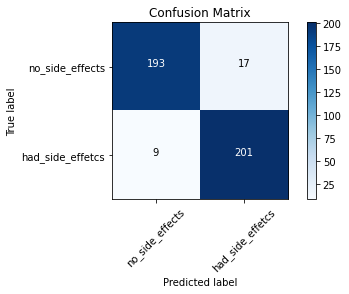

In [22]:
cm_plot_labels = ['no_side_effects','had_side_effetcs']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [23]:
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
  model.save('models/medical_trial_model.h5')

In [24]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [ ]:
new_model.summary()

In [ ]:
new_model.get_weights()

In [ ]:
new_model.optimizer

In [28]:
jason_string=model.to_json()

In [29]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(jason_string)

In [ ]:
model_architecture.summary()

In [32]:
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
  model.save_weights('models/my_model_weights.h5')

In [33]:
model2= Sequential([
    Dense(units=16, input_shape=(1,), activation = 'relu'),
    Dense(units=32, activation = 'relu'),
    Dense(units=2, activation = 'softmax'),
])

In [34]:
model2.load_weights('models/my_model_weights.h5')

In [ ]:
model2.get_weights()